## Random Forest Regressor: Gold Price Prediction


Vamos a estimar el precio del oro mediante un Random Forest Regressor. El Random Forest Regressor se usa para estimar variables numéricas.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#### Carga de datos

In [8]:
datos = pd.read_csv("C:/Users/pauri/OneDrive/Escritorio/Python projects/Random Forest Regressor Gold Price Prediction/gld_price_data.csv")
datos

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


#### Análisis de los datos

* Date = Fecha
* SPX = Índice S&P 500
* GLD = Precio del oro
* USO = Precio del petroleo
* SLV = Precio de la plata
* EUR/USD = Cambio euro a dólar

In [12]:
datos.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

No tenemos missing values

In [17]:
datos.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [40]:
correlation = datos[["SPX","GLD","USO","SLV","EUR/USD"]].corr()

<Axes: >

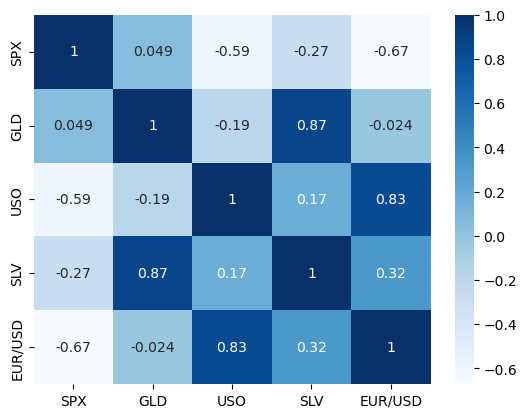

In [42]:
sns.heatmap(datos[["SPX","GLD","USO","SLV","EUR/USD"]].corr(),annot=True, cmap= "Blues")

In [46]:
# La correlación para el valor del oro
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


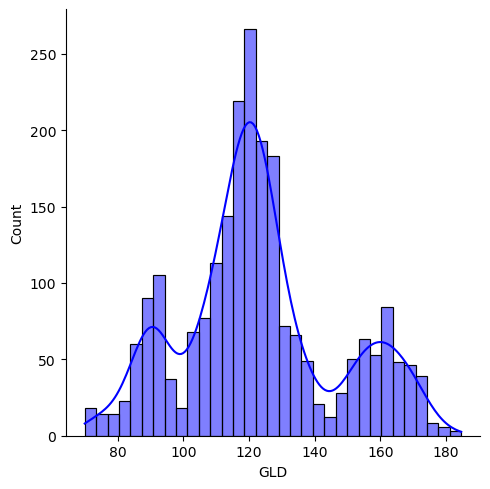

In [58]:
# Distribución de la variable Gold
sns.displot(datos["GLD"],color="blue",kde=True)

#### Estimación/Entrenamiento del Modelo

In [76]:
X = datos.drop(["Date","GLD"],axis=1)
y = datos["GLD"]

In [80]:
(X_train, X_test, y_train, y_test) = train_test_split( X , y, test_size =0.2, random_state=1)

In [113]:
modelo = RandomForestRegressor(n_estimators= 100)

In [115]:
modelo.fit(X_train,y_train)

RandomForestRegressor()

#### Evaluación del Modelo

In [122]:
test_data_prediction = modelo.predict(X_test)
test_data_prediction

array([113.32700034, 148.91250005, 139.35049824, 112.59770215,
       113.72359953,  95.7087994 , 111.7423995 ,  93.3308994 ,
       120.65410054, 127.10849971, 147.83719978, 120.753599  ,
       119.04690071,  88.22580079,  96.07370005,  92.70279868,
       116.77630082,  89.11959898, 125.38670081, 114.98350016,
       118.79009915, 152.67750221, 122.76579817, 120.02759998,
       171.46729949, 108.41199849, 120.57920074,  87.14279851,
        87.88950074,  88.55359949, 121.36020063, 154.24250132,
       150.18059844, 126.04780016, 126.72139983,  90.70219912,
       158.72680012, 121.32420161, 106.56920018, 143.87149682,
        92.60469984, 127.71470064, 117.32420086, 152.82590227,
       119.33209965,  91.21860134,  80.00639981, 120.37480155,
       132.28169998, 119.22860012, 127.28960085, 165.76399987,
       153.16670049,  92.6001995 , 149.15590059, 151.90079896,
       113.19980056, 112.49850029,  87.23789899, 127.70829904,
       125.24180044, 151.78310289, 114.64240016, 110.64

In [136]:
# R cuadrado
r2 = metrics.r2_score(y_test,test_data_prediction)
r2

0.9864303306241423

Nuestro modelo explica en un 98,64% la variable gold.

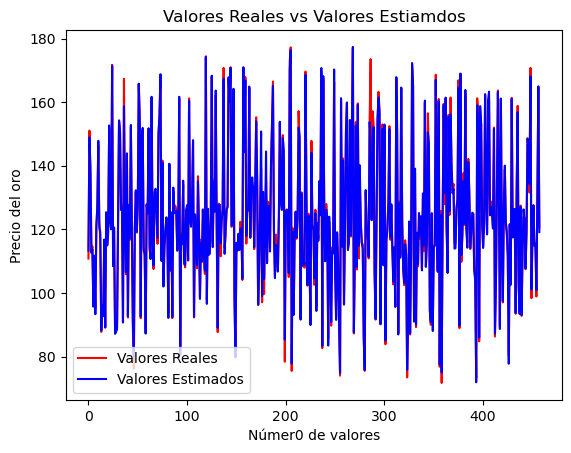

In [146]:
# Comparación de valores estimados con valores reales
plt.plot(list(y_test),color="red",label="Valores Reales")
plt.plot(test_data_prediction,color="blue",label="Valores Estimados")
plt.title("Valores Reales vs Valores Estiamdos")
plt.xlabel("Númer0 de valores")
plt.ylabel("Precio del oro")
plt.legend()
plt.show()


Podemos observar que los Valores Reales y los Valores Estiamdos son bastante parecidos, por lo tanto, es un buen modelo.

 #### Simulador del precio del oro
 
Cogemos los datos reales de cada una de las variables para estimar el precio del oro actual según nuestro modelo.

In [166]:
input_datos = (6015.81,73.80,26.96,1.04)
# Cambiamos los datos de input a un numpy array 
input_datos_as_numpy_array = np.asarray(input_datos)
input_datos_as_numpy_array

array([6.01581e+03, 7.38000e+01, 2.69600e+01, 1.04000e+00])

In [168]:
# Debemos modificar la np array pues estamos prediciendo por una instancia
input_datos_modificados = input_datos_as_numpy_array.reshape(1,-1)
input_datos_modificados

array([[6.01581e+03, 7.38000e+01, 2.69600e+01, 1.04000e+00]])

In [170]:
predicción = modelo.predict(input_datos_modificados)
predicción

C:\Users\pauri\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([151.32200108])

Según nuestro modelo, el precio del oro actual es de 151,32€